In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_digits, load_iris
from sklearn.metrics import mean_squared_error

from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder

from category_encoders import OneHotEncoder

from sklearn.pipeline import make_pipeline
import sklearn
sklearn.set_config(display = 'diagram')
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('../datasets/train.csv')

In [3]:
pd.options.display.max_rows = None

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [30]:
df['MS SubClass'] = df['MS SubClass'].astype('object')
df['Bsmt Qual'] = df['Bsmt Qual'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['Mas Vnr Area'] = df['Mas Vnr Area'].replace(np.nan, 0)

In [32]:
df = df[df['Total Bsmt SF'].notna()]
df = df[df['Garage Area'].notna()]

In [202]:
X = df[['Misc Val',  'Gr Liv Area', 'Overall Cond',  'Overall Qual', 'Screen Porch',  'Lot Area',  'BsmtFin SF 1', 'Year Built',  'Mas Vnr Area', 'Neighborhood',  'Garage Area', 'MS SubClass']]

In [ ]:
# plt.figure(figsize = (15, 10))
# sns.heatmap(X.corr(), annot = True);

In [ ]:
# poly = PolynomialFeatures(interaction_only = True)
# X_poly = poly.fit_transform(X)
# pd.options.display.max_columns = None
# pd.DataFrame(X_poly).head()

In [203]:
ohe = OneHotEncoder(use_cat_names = True)

In [204]:
X_encoded = ohe.fit_transform(X)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [205]:
model = sm.OLS(y, X_encoded).fit()

In [206]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     247.7
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:13:17   Log-Likelihood:                -23963.
No. Observations:                2049   AIC:                         4.803e+04
Df Residuals:                    1996   BIC:                         4.833e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Misc Val               -10.0644      1.167     -8.624      0.000     -12.353      -7.776
Gr Liv Area             53.8695      2.320     23.215      0.000      49.319      58.420
Overall Cond          5917.1012    688.090      8.599      0.000    4567.651    7266.552
Overall Qual          1.483e+04    864.549     17.151      0.000    1.31e+04    1.65e+04
Screen Porch            86.4754     11.738      7.367      0.000      63.456     109.495
Lot Area                 0.4834      0.122      3.974      0.000       0.245       0.722
BsmtFin SF 1            21.1606      1.687     12.546      0.000      17.853      24.468
Year Built             570.0459     62.755      9.084      0.000     446.973     693.118
Mas Vnr Area            24.3051      4.803      5.061      0.000      14.886      33.724
Neighborhood_Sawyer  -4.473e+05   4.44e+04    -10.082      0.000   -5.34e+05    -3.6e+05
Neighborhood_SawyerW -4.472e+05   4.55e+04     -9.823      0.000   -5.36e+05   -3.58e+05
Neighborhood_NAmes   -4.485e+05    4.4e+04    -10.188      0.000   -5.35e+05   -3.62e+05
Neighborhood_Timber  -4.295e+05   4.57e+04     -9.404      0.000   -5.19e+05    -3.4e+05
Neighborhood_Edwards -4.521e+05   4.43e+04    -10.206      0.000   -5.39e+05   -3.65e+05
Neighborhood_OldTown -4.485e+05   4.34e+04    -10.331      0.000   -5.34e+05   -3.63e+05
Neighborhood_BrDale  -4.335e+05   4.46e+04     -9.725      0.000   -5.21e+05   -3.46e+05
Neighborhood_CollgCr -4.415e+05   4.57e+04     -9.655      0.000   -5.31e+05   -3.52e+05
Neighborhood_Somerst -4.197e+05   4.58e+04     -9.157      0.000    -5.1e+05    -3.3e+05
Neighborhood_Mitchel -4.458e+05   4.52e+04     -9.862      0.000   -5.34e+05   -3.57e+05
Neighborhood_StoneBr -3.626e+05   4.55e+04     -7.974      0.000   -4.52e+05   -2.73e+05
Neighborhood_NridgHt -3.817e+05   4.57e+04     -8.351      0.000   -4.71e+05   -2.92e+05
Neighborhood_Gilbert -4.429e+05   4.58e+04     -9.667      0.000   -5.33e+05   -3.53e+05
Neighborhood_Crawfor -4.199e+05   4.44e+04     -9.463      0.000   -5.07e+05   -3.33e+05
Neighborhood_IDOTRR  -4.485e+05   4.38e+04    -10.251      0.000   -5.34e+05   -3.63e+05
Neighborhood_NWAmes  -4.565e+05   4.47e+04    -10.203      0.000   -5.44e+05   -3.69e+05
Neighborhood_Veenker -4.229e+05   4.53e+04     -9.334      0.000   -5.12e+05   -3.34e+05
Neighborhood_MeadowV -4.257e+05   4.47e+04     -9.513      0.000   -5.13e+05   -3.38e+05
Neighborhood_SWISU   -4.499e+05    4.4e+04    -10.216      0.000   -5.36e+05   -3.64e+05
Neighborhood_NoRidge -4.077e+05   4.55e+04     -8.965      0.000   -4.97e+05   -3.18e+05
Neighborhood_ClearCr -4.251e+05   4.52e+04     -9.415      0.000   -5.14e+05   -3.37e+05
Neighborhood_Blmngtn -4.168e+05   4.63e+04     -9.011      0.000   -5.07e+05   -3.26e+05
Neighborhood_BrkSide -4.427e+05    4.4e+04    -10.059    

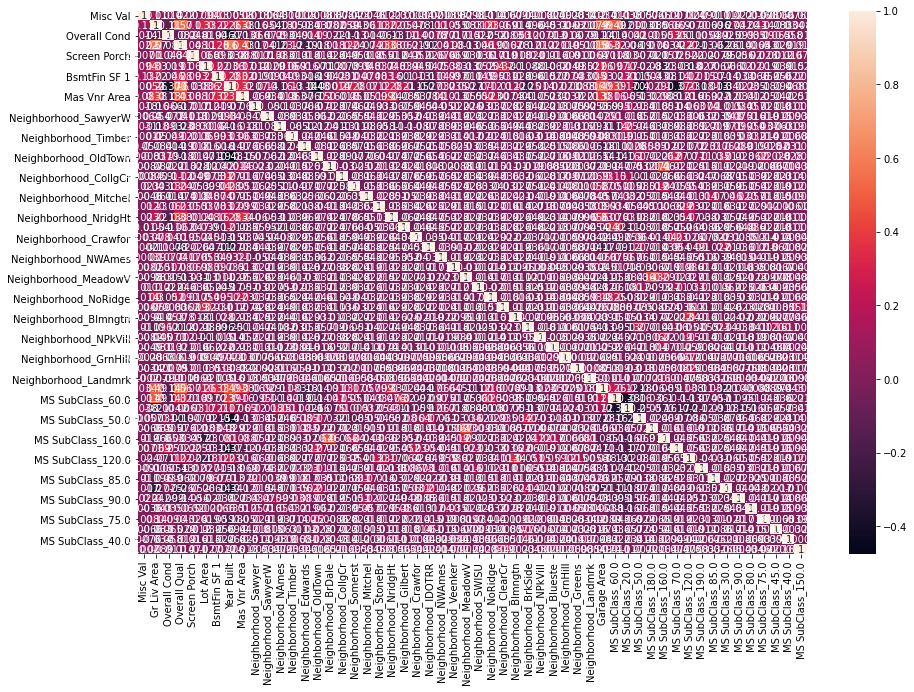

In [215]:
plt.figure(figsize = (15, 10))
sns.heatmap(X_encoded.corr(), annot = True);

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [209]:
pipe = make_pipeline(OneHotEncoder(use_cat_names = True), PolynomialFeatures(), StandardScaler(), ElasticNet())
pipe

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [210]:
params = {
    'polynomialfeatures__interaction_only': [True, False],
    'elasticnet__alpha': [.1, 1, 10, 100]
}

In [211]:
gs = GridSearchCV(pipe, params, n_jobs = -1) 

In [212]:
gs.fit(X_train, y_train)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


GridSearchCV(estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': [0.1, 1, 10, 100],
                         'polynomialfeatures__interaction_only': [True, False]})

In [213]:
gs.best_params_

{'elasticnet__alpha': 1, 'polynomialfeatures__interaction_only': True}

In [214]:
pd.DataFrame(gs.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elasticnet__alpha,param_polynomialfeatures__interaction_only,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.662624,0.162273,0.082216,0.021320,1,True,"{'elasticnet__alpha': 1, 'polynomialfeatures__...",0.803283,0.916450,0.892890,0.735672,0.906178,0.850895,0.070229,1
3,3.596450,0.080387,0.124742,0.030481,1,False,"{'elasticnet__alpha': 1, 'polynomialfeatures__...",0.829200,0.919803,0.896912,0.697905,0.910297,0.850823,0.082790,2
5,0.749235,0.131301,0.058866,0.011910,10,False,"{'elasticnet__alpha': 10, 'polynomialfeatures_...",0.793851,0.874106,0.851747,0.766389,0.847788,0.826776,0.040089,3
4,0.724761,0.023199,0.090530,0.020557,10,True,"{'elasticnet__alpha': 10, 'polynomialfeatures_...",0.786787,0.863143,0.840392,0.774888,0.834932,0.820029,0.033581,4
0,3.142674,0.095860,0.069572,0.014671,0.1,True,"{'elasticnet__alpha': 0.1, 'polynomialfeatures...",0.805911,0.906314,0.889787,0.414919,0.910898,0.785566,0.189179,5
1,3.876663,0.109287,0.106917,0.017545,0.1,False,"{'elasticnet__alpha': 0.1, 'polynomialfeatures...",0.821676,0.909869,0.893130,0.258488,0.913840,0.759401,0.252653,6
7,0.545114,0.045072,0.052170,0.001596,100,False,"{'elasticnet__alpha': 100, 'polynomialfeatures...",0.494280,0.498345,0.482597,0.477674,0.471470,0.484873,0.010066,7
6,0.466446,0.018024,0.057381,0.010948,100,True,"{'elasticnet__alpha': 100, 'polynomialfeatures...",0.458416,0.460204,0.445128,0.443793,0.434415,0.448391,0.009666,8


In [216]:
pipe = make_pipeline(OneHotEncoder(use_cat_names = True), PolynomialFeatures(interaction_only=True), StandardScaler(), ElasticNet(alpha = 1))
pipe

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=1))])

In [217]:
pipe.fit(X_train, y_train)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighborhood', 'MS SubClass'],
                               use_cat_names=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=1))])

In [218]:
# pipe_rfe = pipe.named_steps['rfe'].support_
# pipe_rfe

In [219]:
# pd.DataFrame(pipe_rfe, pipe.named_steps['polynomialfeatures'].get_feature_names())

In [220]:
pipe.score(X_train, y_train)

0.930562710495628

In [221]:
pipe.score(X_test, y_test)

0.7689154300674262

In [222]:
preds = pipe.predict(X_test)

In [223]:
mean_squared_error(preds, y_test, squared = False)

38929.91679983381

In [224]:
pipe.fit(X, y)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighborhood', 'MS SubClass'],
                               use_cat_names=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=1))])

In [225]:
pipe.score(X, y)

0.9221630452574106

In [226]:
preds = pipe.predict(X)

In [227]:
mean_squared_error(preds, y, squared = False)

22108.158070094076

Model 6= 23738 on X, y<br>
 on X_train, y_train

In [232]:
df_test = pd.read_csv('../datasets/test.csv')
df_test['MS SubClass'] = df_test['MS SubClass'].astype('object')
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_test['Mas Vnr Area'] = df_test['Mas Vnr Area'].replace(np.nan, 0)
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [233]:
X_test = df_test[['Misc Val',  'Gr Liv Area', 'Overall Cond',  'Overall Qual', 'Screen Porch',  'Lot Area',  'BsmtFin SF 1', 'Year Built',  'Mas Vnr Area', 'Neighborhood',  'Garage Area', 'MS SubClass']]
X_test.shape

(878, 12)

In [234]:
predictions = pipe.predict(X_test)
predictions.shape

(878,)

In [235]:
df_sales = pd.DataFrame(predictions, columns = ['SalePrice'])
df_sales.shape

(878, 1)

In [236]:
df_model7 = pd.concat([df_test['Id'], df_sales], axis = 1)
df_model7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         878 non-null    int64  
 1   SalePrice  878 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB


In [237]:
df_model7.set_index('Id', inplace = True)

In [238]:
df_model7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  878 non-null    float64
dtypes: float64(1)
memory usage: 13.7 KB


In [239]:
df_model7.to_csv('../submissions/model7_submission.csv')

Used: 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Year Built', 'Garage Area', 'Roof Matl', 'Land Contour', 'Neighborhood', 'Bsmt Qual', 'Misc Val'<br>
Converted 'Bsmt Qual' to 0-5

pipe = make_pipeline(OneHotEncoder(use_cat_names = True), PolynomialFeatures(interaction_only = True), StandardScaler(), Ridge(alpha = 100))